In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
import math

/Users/Andrew-MB/DEV/08.PYTHON/01.WORKSPACE/slowcampus0202/env/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/Andrew-MB/DEV/08.PYTHON/01.WORKSPACE/slowcampus0202/env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# y = w * x + b 함수
def myfunc(x):
  y = math.cos(x) + math.sin(x) * math.sin(x)
  noise = random.random() * 0.1 # Noise
  return y + y*noise

In [3]:
# random.random() -- 0.0 ~ 1.0
NUM_DATA = 100          # 데이터 갯수
XVALUE = 5              # X값의 범위 (0.0 ~ 5.0)
# type: python list
xtrain = [random.random() * XVALUE for i in range(NUM_DATA)]
xtrain.sort()            # sorting

In [4]:
ytrain = [myfunc(x) for x in xtrain]
print('xtrain :',xtrain[:3])
print('ytrain :',ytrain[:3])

xtrain : [0.02456481883757522, 0.10338984820592478, 0.11612865207525025]
ytrain : [1.0264748221972768, 1.0844083308482115, 1.1006671815457285]


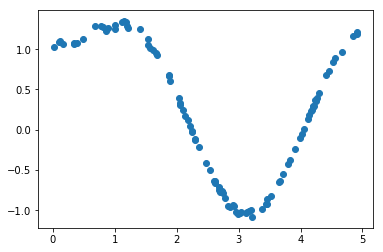

In [5]:
# actual data 산점도
fig, ax = plt.subplots()
ax.scatter(xtrain, ytrain, label='actual')
plt.show()

In [6]:
# type 변환 python list -> numpy ndarray
# type: numpy ndarray
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)
print('xlist.shape :',xtrain.shape)  # shape ==  (10,)
print('ylist.shape :',ytrain.shape)  # shape ==  (10,)

xlist.shape : (100,)
ylist.shape : (100,)


In [7]:
# tensor 에 맞추기 위해 reshape
xtrain = xtrain.reshape((NUM_DATA, 1))  # shape ==  (10,1)
ytrain = ytrain.reshape((NUM_DATA, 1))  # shape ==  (10,1)
print('xlist.shape :', xtrain.shape)
print('ylist.shape :', ytrain.shape)

xlist.shape : (100, 1)
ylist.shape : (100, 1)


In [8]:
X = tf.placeholder(tf.float32, [None, 1])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal([1,10], -1, 1), name='weight')
B = tf.Variable(tf.random_normal([10], -1, 1), name='bias')
H1 = tf.nn.sigmoid(tf.matmul(X, W) + B)

W2 = tf.Variable(tf.random_normal([10,1], -1, 1), name='weight1')
B2 = tf.Variable(tf.random_normal([1], -1, 1), name='bias1')
Y2 = (tf.matmul(H1, W2) + B2)   # [1,1]행렬 x [1,1]행렬 + [1]



In [9]:
# 손실 함수
cost_function = tf.reduce_mean(tf.square(Y2 - Y))
# 옵티마이저
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
optimizer = tf.train.AdamOptimizer(learning_rate=0.2)
training = optimizer.minimize(cost_function)

In [10]:
# loss list
history = []           # Record loss values for plot

In [11]:
# Session 시작
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(3000):
  res, cost  = sess.run([training, cost_function],
                        feed_dict={X: xtrain, Y:ytrain})
  if i % 50 == 0:
    y2, w, b = sess.run([Y2, W, B], feed_dict={X: xtrain, Y: ytrain})
    #print('[%04d]' % i, 'LOSS', cost, 'W', w, 'bias', b)
    print('[%04d]' % i, 'LOSS', cost)

    history.append(cost)

[0000] LOSS 26.231525
[0050] LOSS 0.5701498
[0100] LOSS 0.3496622
[0150] LOSS 0.29749882
[0200] LOSS 0.28898427
[0250] LOSS 0.285536
[0300] LOSS 0.28339627
[0350] LOSS 0.2799401
[0400] LOSS 0.22820774
[0450] LOSS 0.046199474
[0500] LOSS 0.012213446
[0550] LOSS 0.007095728
[0600] LOSS 0.0050454484
[0650] LOSS 0.0040396936
[0700] LOSS 0.0034110742
[0750] LOSS 0.0027709657
[0800] LOSS 0.002102197
[0850] LOSS 0.0018154338
[0900] LOSS 0.001696172
[0950] LOSS 0.0015941134
[1000] LOSS 0.0014925161
[1050] LOSS 0.0013924697
[1100] LOSS 0.0013004404
[1150] LOSS 0.0012228462
[1200] LOSS 0.0029771256
[1250] LOSS 0.0011908459
[1300] LOSS 0.0011056405
[1350] LOSS 0.0010734351
[1400] LOSS 0.0010502416
[1450] LOSS 0.0012028698
[1500] LOSS 0.0010474741
[1550] LOSS 0.0010244742
[1600] LOSS 0.001007621
[1650] LOSS 0.0011724542
[1700] LOSS 0.0010288086
[1750] LOSS 0.0010054945
[1800] LOSS 0.000986191
[1850] LOSS 0.010751443
[1900] LOSS 0.0010995979
[1950] LOSS 0.0010051946
[2000] LOSS 0.0009827929
[2050] 

In [12]:
## loss 값의 변화 그래프

No handles with labels found to put in legend.


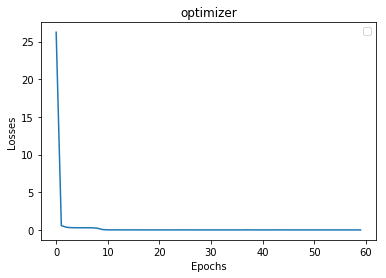

In [13]:
# Plot the accuracy and cost summaries
f, ax = plt.subplots()

ax.plot(history)    # GradientDescentOptimizer
ax.set_title('optimizer')

plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()

## 학습 데이터에 대한 정확도 확인 (학습 오차 확인)

In [14]:
y_from_nn = sess.run([Y2], feed_dict={X: xtrain})

for y_nn, y_real in zip(y_from_nn[0], ytrain):
    err = abs(y_nn[0] - y_real) / y_real * 100
    print('%.2f  %.2f 오차율 %.2f %%' % (y_nn[0], y_real, err))
    

1.02  1.03 오차율 0.16 %
1.04  1.08 오차율 3.92 %
1.05  1.10 오차율 5.05 %
1.06  1.06 오차율 0.18 %
1.11  1.08 오차율 2.97 %
1.12  1.07 오차율 4.43 %
1.13  1.08 오차율 5.07 %
1.17  1.13 오차율 3.57 %
1.24  1.28 오차율 3.68 %
1.26  1.29 오차율 2.14 %
1.27  1.27 오차율 0.37 %
1.28  1.23 오차율 4.06 %
1.28  1.26 오차율 1.75 %
1.30  1.30 오차율 0.25 %
1.30  1.26 오차율 3.28 %
1.29  1.34 오차율 3.55 %
1.29  1.34 오차율 4.16 %
1.28  1.34 오차율 4.28 %
1.28  1.29 오차율 0.79 %
1.27  1.27 오차율 0.44 %
1.20  1.25 오차율 4.21 %
1.10  1.05 오차율 4.44 %
1.10  1.13 오차율 2.79 %
1.07  1.01 오차율 5.71 %
1.01  0.99 오차율 2.23 %
0.97  0.96 오차율 1.00 %
0.94  0.93 오차율 1.08 %
0.68  0.68 오차율 0.69 %
0.67  0.67 오차율 0.19 %
0.63  0.61 오차율 3.53 %
0.39  0.39 오차율 0.25 %
0.35  0.34 오차율 4.25 %
0.33  0.31 오차율 7.80 %
0.26  0.25 오차율 4.83 %
0.18  0.17 오차율 8.10 %
0.11  0.12 오차율 3.24 %
0.04  0.04 오차율 10.42 %
-0.03  -0.02 오차율 -31.81 %
-0.03  -0.02 오차율 -24.18 %
-0.13  -0.12 오차율 -11.05 %
-0.13  -0.13 오차율 -4.73 %
-0.23  -0.21 오차율 -7.88 %
-0.45  -0.42 오차율 -7.10 %
-0.53  -0.50 오차율 -5.36 %
-0.63  

## 테스트 데이터로 해보기

In [15]:
x_unseen = [random.random() * XVALUE for i in range(NUM_DATA)]
x_unseen = np.array(x_unseen).reshape((NUM_DATA, 1))

y_unseen = sess.run([Y2], feed_dict={X: x_unseen})

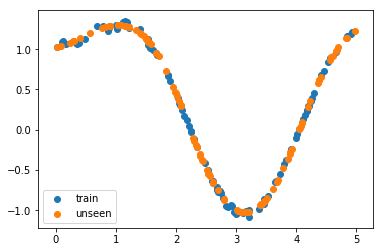

In [16]:
fig, ax = plt.subplots()
ax.scatter(xtrain, ytrain, label='train')
ax.scatter(x_unseen, y_unseen, label='unseen')

ax.legend()
plt.show()